### Imports and Inputs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
import xarray as xr
import geopandas as gpd
import pandas as pd
#import xesmf as xe 

# requires cartopy to be installed
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features
from cartopy.util import add_cyclic_point
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
#from matplotlib.colors import TwoSlopeNorm
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from collections import Counter
import sys
import os
import time


In [3]:
models = ["BNU-ESM", "CNRM-CM5", "CSIRO-Mk3-6-0", "CanESM2", "GFDL-ESM2G", "GFDL-ESM2M", "HadGEM2-CC365", "HadGEM2-ES365", "IPSL-CM5A-LR",
         "IPSL-CM5A-MR", "IPSL-CM5B-LR", "MIROC-ESM-CHEM", "MIROC-ESM", "MIROC5", "bcc-csm1-1-m", "MRI-CGCM3", "bcc-csm1-1", "inmcm4"]

### Statistical Quantities from pre-processed data

In [5]:
start_time = time.time()

def coarsened_all(models):


    trendline_array = []
    deviation_array = []
    average_array = []
    normal_deviation_array = []
    for model in models:
        
        print(time.time() - start_time)           #####################################3#######################################################
        filein = "/data/rsriver/a/ctavila2/FWI_cleaned/macav2metdata_fwi_" + model + "_r1i1p1_rcp8.5_tmaxrhmin_1979_2022_CONUS_daily_DASK_oregon.nc"
        current_model = xr.open_dataset(filein)
    
    
        spatial_aggregate = current_model.mean(dim=['time'])
        yearly_mean = current_model.groupby('time.year').mean(dim='time')
    
        poly_coeffs = yearly_mean.FWI.polyfit(dim="year", deg=1).rename({"polyfit_coefficients":"FWI"}) 
        poly_fits = xr.polyval(coord=yearly_mean["year"], coeffs=poly_coeffs)
        trendline = poly_coeffs.sel(degree=1).FWI 
        trendline_values = trendline * yearly_mean["year"] + poly_coeffs.sel(degree=0).FWI 
        # this gives me my mx+b value at each point, essentially giving me the predicted value from the linear regression
        residuals = yearly_mean.FWI - trendline_values
        standard_deviation_residuals = residuals.std(dim='year')
        fwi_benchmark = yearly_mean.std(dim='year')
        
            
        deviation_array.append(standard_deviation_residuals)
        trendline_array.append(trendline)
        average_array.append(spatial_aggregate)
        normal_deviation_array.append(fwi_benchmark)
        
        print("iteration " + model)

    return trendline_array, deviation_array, average_array, normal_deviation_array
    




In [6]:
trendline_array, deviation_array, average_array, normal_deviation_array = coarsened_all(models=models)

2.0065298080444336


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration BNU-ESM
34.153703451156616


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration CNRM-CM5
65.33266639709473


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration CSIRO-Mk3-6-0
94.59640765190125


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration CanESM2
126.1978325843811


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration GFDL-ESM2G
159.48041319847107


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration GFDL-ESM2M
194.76037573814392


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration HadGEM2-CC365
229.42142057418823


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration HadGEM2-ES365
262.5927996635437


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration IPSL-CM5A-LR
297.9153366088867


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration IPSL-CM5A-MR
329.59347128868103


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration IPSL-CM5B-LR
364.0874123573303


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration MIROC-ESM-CHEM
397.4413049221039


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration MIROC-ESM
434.0660591125488


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration MIROC5
466.4307072162628


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration bcc-csm1-1-m
501.9610641002655


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration MRI-CGCM3
533.6521127223969


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


iteration bcc-csm1-1
564.285685300827
iteration inmcm4


/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/keeling/a/ctavila2/mambaforge/envs/FWI/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [7]:
concatenated_data = xr.concat(trendline_array, dim='array')

# Take the mean along the 'array' dimension
average_trendline = concatenated_data.mean(dim='array')##########################

concatenated_dev_resids = xr.concat(deviation_array, dim='array')
rmse = concatenated_dev_resids.mean(dim='array') ###########################

concatenated_data = xr.concat(average_array, dim='array')

# Take the mean along the 'array' dimension
average_average = concatenated_data.mean(dim='array')##########################
concatenated_data = xr.concat(normal_deviation_array, dim='array')

# Take the mean along the 'array' dimension
average_normal_deviation = concatenated_data.mean(dim='array')########################

### Plotting

#### Average

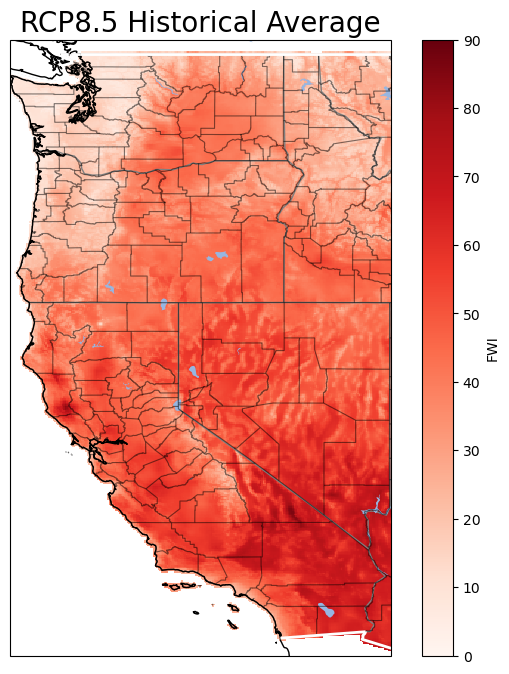

In [41]:
reader = shpreader.Reader('/data/keeling/a/ctavila2/2_maps/county_shapefile/countyl010g.shp')
counties = list(reader.geometries())

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

scale = '110m'
states110 = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale=scale,
            facecolor='none',
            edgecolor='r')


cmap='Reds'

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})

average_average.FWI.plot(ax=ax,cmap=cmap,vmin=0,vmax=90)


ax.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '110m', edgecolor='gray', facecolor='none'))
ax.coastlines()
ax.add_feature(cfeature.LAKES)
ax.add_feature(COUNTIES, linewidth=0.8, alpha=0.5, facecolor='none', edgecolor='black')
ax.add_feature(cfeature.BORDERS, linewidth=2, edgecolor='white')


plt.title('RCP8.5 Historical Average', fontsize=20)
plt.savefig(f'/data/keeling/a/ctavila2/2024_FWI_CMIP5_Ensemble_Avila/final_figures/figure_1_rcp85_gridmet_historical_v2/avg/0_0_1_CMIP5_v1_Ensemble_Average_mxtmp_rhmin_1979_2022_{cmap}')


#### Trendline

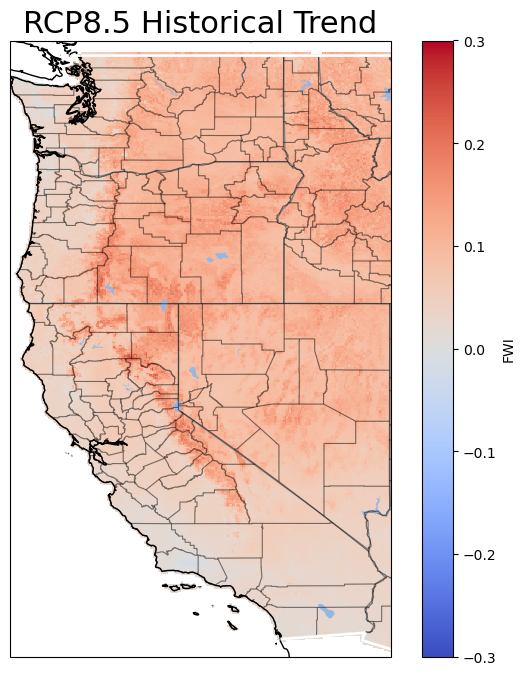

In [45]:
reader = shpreader.Reader('/data/keeling/a/ctavila2/2_maps/county_shapefile/countyl010g.shp')
counties = list(reader.geometries())

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

scale = '110m'
states110 = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale=scale,
            facecolor='none',
            edgecolor='r')


cmap='coolwarm'

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
average_trendline.plot(ax=ax,cmap=cmap,vmin=-.3,vmax=.3)


ax.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '110m', edgecolor='gray', facecolor='none'))
ax.coastlines()
ax.add_feature(cfeature.LAKES)
ax.add_feature(COUNTIES, linewidth=0.8, alpha=0.5, facecolor='none', edgecolor='black')
ax.add_feature(cfeature.BORDERS, linewidth=2, edgecolor='white')


plt.title('RCP8.5 Historical Trend', fontsize=22)
plt.savefig(f'/data/keeling/a/ctavila2/2024_FWI_CMIP5_Ensemble_Avila/final_figures/figure_1_rcp85_gridmet_historical_v2/0_1_1_CMIP5_v1_Ensemble_Average_mxtmp_rhmin_1979_2022_{cmap}')


#### Std D Resids

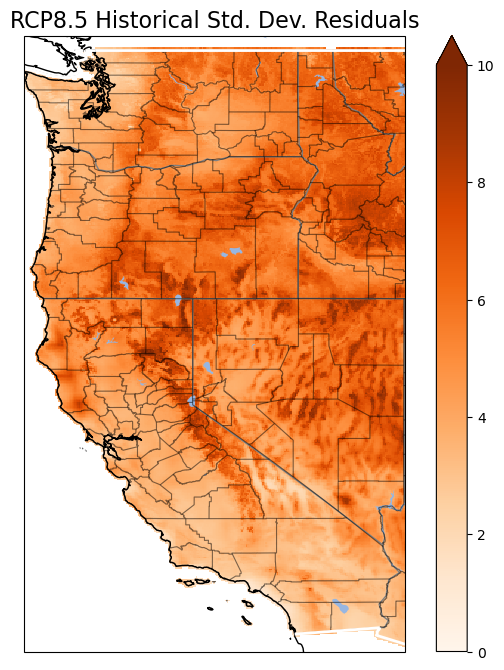

In [47]:
reader = shpreader.Reader('/data/keeling/a/ctavila2/2_maps/county_shapefile/countyl010g.shp')
counties = list(reader.geometries())

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

scale = '110m'
states110 = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale=scale,
            facecolor='none',
            edgecolor='r')


cmap='Oranges'

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
rmse.plot(ax=ax,cmap=cmap,vmin=0,vmax=10)


ax.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '110m', edgecolor='gray', facecolor='none'))
ax.coastlines()
ax.add_feature(cfeature.LAKES)
ax.add_feature(COUNTIES, linewidth=0.8, alpha=0.5, facecolor='none', edgecolor='black')
ax.add_feature(cfeature.BORDERS, linewidth=2, edgecolor='white')


plt.title('RCP8.5 Historical Std. Dev. Residuals', fontsize=16)
plt.savefig('/data/keeling/a/ctavila2/2024_FWI_CMIP5_Ensemble_Avila/final_figures/figure_1_rcp85_gridmet_historical_v2/1_2_CMIP5_RCP85_Ensemble_Standard_Deviation_RESIDS_mxtmp_rhmin_1979_2022')
